In [1]:
%pip install pandas matplotlib scipy seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import argparse
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import seaborn as sns
import glob
from scipy import stats
from scipy.signal import savgol_filter
from dateutil import tz

In [128]:
N_STARLINK = 'Starlink'
N_SHAW = 'Home'
#src_dirs = ['data/trad_ping_2022-04-14', 'data/starlink_ping_2022-04-14/']
src_dirs = ['data/2022-05-28_traditional_measures_ping/', 'data/2022-05-28_starlink_measurements_ping/']

#matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
sns.set_context("paper", rc={"font.size":9,"axes.titlesize":9,"axes.labelsize":8, "xtick.labelsize":8})

In [129]:
from common import combine_csvs

In [130]:
df = pd.DataFrame()
for folder in src_dirs:
    for region in os.scandir(folder):
        pattern = f"{region.path}/*"
        print(pattern)
        df_temp = combine_csvs(glob.glob(pattern, recursive=True), 3)
        df_temp.index = pd.to_datetime(df_temp.index, unit='s')
        df_temp = df_temp.iloc[:,[2]]
        df_temp.rename(columns={df_temp.columns[0]: os.path.join(folder, region.name)}, inplace=True)

        df = df.merge(df_temp, how='outer', left_index=True, right_index=True)

df

data/2022-05-28_traditional_measures_ping/South_America_Sao_Paulo/*
data/2022-05-28_traditional_measures_ping/Asia_Pacific_Singapore/*
data/2022-05-28_traditional_measures_ping/Asia_Pacific_Sydney/*
data/2022-05-28_traditional_measures_ping/Africa_Cape_Town/*
data/2022-05-28_traditional_measures_ping/US_West_N_California/*
data/2022-05-28_traditional_measures_ping/Middle_East_Bahrain/*
data/2022-05-28_traditional_measures_ping/Asia_Pacific_Tokyo/*
data/2022-05-28_traditional_measures_ping/Europe_London/*
data/2022-05-28_traditional_measures_ping/Asia_Pacific_Mumbai/*
data/2022-05-28_starlink_measurements_ping/South_America_Sao_Paulo/*
data/2022-05-28_starlink_measurements_ping/Asia_Pacific_Singapore/*
data/2022-05-28_starlink_measurements_ping/Asia_Pacific_Sydney/*
data/2022-05-28_starlink_measurements_ping/Africa_Cape_Town/*
data/2022-05-28_starlink_measurements_ping/US_West_N_California/*
data/2022-05-28_starlink_measurements_ping/Middle_East_Bahrain/*
data/2022-05-28_starlink_measur

In [133]:
# https://stackoverflow.com/questions/69300483/how-to-use-markers-with-ecdf-plot
def ecdf(data, array: bool=True):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    if not array:
        return pd.DataFrame({'x': x, 'y': y})
    else:
        return x, y

In [134]:
num_regs = int(len(df.columns) / 2) # One for each of Shaw vs Starlink
cols = df.columns.tolist()

new_cols = []
for col in cols:
    region = os.path.basename(col).replace('_',' ').strip()
    new_cols.append(region)

#regions = ['Mumbai', 'Sydney', 'Singapore', 
#        'N. California', 'London', 'Bahrain', 'Sao Paulo', 'Tokyo', 'Africa']

multi_cols = [
        [N_SHAW] * num_regs + [N_STARLINK] * num_regs,
        new_cols
        ]
df.set_axis(multi_cols, axis=1, inplace=True)
df

Shaw                         \
                    South America Sao Paulo Asia Pacific Singapore   
2022-05-28 05:54:48                     NaN                    NaN   
2022-05-28 05:54:49                     NaN                  192.0   
2022-05-28 05:54:50                     NaN                  198.0   
2022-05-28 05:54:51                     NaN                  197.0   
2022-05-28 05:54:52                     NaN                  193.0   
...                                     ...                    ...   
2022-06-02 07:46:11                     NaN                    NaN   
2022-06-02 07:46:12                     NaN                    NaN   
2022-06-02 07:46:13                     NaN                    NaN   
2022-06-02 07:46:14                     NaN                    NaN   
2022-06-02 07:46:15                     NaN                    NaN   

                                                                               \
                    Asia Pacific Sydney Africa Cape Town US West N California   
2022-05-28 05:54:48               151.0              NaN                  NaN   
2022-05-28 05:54:49               151.0              NaN                  NaN   
2022-05-28 05:54:50               151.0              NaN                  NaN   
2022-05-28 05:54:51               151.0              NaN                  NaN   
2022-05-28 05:54:52               150.0              NaN                  NaN   
...                                 ...              ...                  ...   
2022-06-02 07:46:11                 NaN              NaN                  NaN   
2022-06-02 07:46:12                 NaN              NaN                  NaN   
2022-06-02 07:46:13                 NaN              NaN                  NaN   
2022-06-02 07:46:14                 NaN              NaN                  NaN   
2022-06-02 07:46:15                 NaN              NaN                  NaN   

                                                                          \
                    Middle East Bahrain Asia Pacific Tokyo Europe London   
2022-05-28 05:54:48                 NaN                NaN           NaN   
2022-05-28 05:54:49                 NaN                NaN           NaN   
2022-05-28 05:54:50                 NaN              141.0           NaN   
2022-05-28 05:54:51                 NaN              141.0           NaN   
2022-05-28 05:54:52                 NaN              139.0           NaN   
...                                 ...                ...           ...   
2022-06-02 07:46:11                 NaN                NaN           NaN   
2022-06-02 07:46:12                 NaN                NaN           NaN   
2022-06-02 07:46:13                 NaN                NaN           NaN   
2022-06-02 07:46:14                 NaN                NaN           NaN   
2022-06-02 07:46:15                 NaN                NaN           NaN   

                                                       Starlink  \
                    Asia Pacific Mumbai South America Sao Paulo   
2022-05-28 05:54:48                 NaN                     NaN   
2022-05-28 05:54:49                 NaN                     NaN   
2022-05-28 05:54:50                 NaN                     NaN   
2022-05-28 05:54:51                 NaN                     NaN   
2022-05-28 05:54:52               269.0                     NaN   
...                                 ...                     ...   
2022-06-02 07:46:11                 NaN                   208.0   
2022-06-02 07:46:12                 NaN                   218.0   
2022-06-02 07:46:13                 NaN                   200.0   
2022-06-02 07:46:14                 NaN                   207.0   
2022-06-02 07:46:15                 NaN                     NaN   

                                                                \
                    Asia Pacific Singapore Asia Pacific Sydney   
2022-05-28 05:54:48                    NaN                 NaN   
2022-05-28 05:5

In [135]:
# Filter
df_processed = df
#df_processed = df.loc['2022-05-13 07:13:50':'2022-05-13 7:14:18']
#df_processed = df.loc['2022-05-10 08:29:00':'2022-05-10 8:33:00']
df_processed = df_processed.resample('H').mean()
#df_processed.to_csv('output/out.csv')
df_processed

Shaw                         \
                    South America Sao Paulo Asia Pacific Singapore   
2022-05-28 05:00:00              191.383117             194.289389   
2022-05-28 06:00:00              192.244077             195.899751   
2022-05-28 07:00:00              194.210235             197.846599   
2022-05-28 08:00:00              192.050847             194.948045   
2022-05-28 09:00:00              193.884925             197.086572   
...                                     ...                    ...   
2022-06-02 03:00:00              190.370590             193.299272   
2022-06-02 04:00:00              190.305212             193.138941   
2022-06-02 05:00:00              190.415430             193.301887   
2022-06-02 06:00:00              190.431405             193.341490   
2022-06-02 07:00:00              190.240042             193.171721   

                                                                               \
                    Asia Pacific Sydney Africa Cape Town US West N California   
2022-05-28 05:00:00          152.562300       294.490196            34.904235   
2022-05-28 06:00:00          153.229413       295.398513            35.294977   
2022-05-28 07:00:00          155.307163       297.233820            38.406628   
2022-05-28 08:00:00          152.552394       294.701149            35.515288   
2022-05-28 09:00:00          155.483360       296.365632            37.595488   
...                                 ...              ...                  ...   
2022-06-02 03:00:00          151.399838       324.490708            32.995310   
2022-06-02 04:00:00          151.715054       312.047811            32.761888   
2022-06-02 05:00:00          151.298246       304.476691            33.059800   
2022-06-02 06:00:00          151.743276       289.175848            32.876693   
2022-06-02 07:00:00          151.281030       288.747710            32.917871   

                                                                          \
                    Middle East Bahrain Asia Pacific Tokyo Europe London   
2022-05-28 05:00:00          227.093851         142.435897    144.067742   
2022-05-28 06:00:00          228.118490         143.330672    146.383365   
2022-05-28 07:00:00          230.291838         145.143604    147.930816   
2022-05-28 08:00:00          227.401915         142.854795    144.508488   
2022-05-28 09:00:00          229.864293         145.656476    146.763144   
...                                 ...                ...           ...   
2022-06-02 03:00:00          262.750808         140.420458    178.477781   
2022-06-02 04:00:00          248.902688         140.635826    166.292585   
2022-06-02 05:00:00          241.009442         140.397464    159.711974   
2022-06-02 06:00:00          226.953545         140.307337    145.704971   
2022-06-02 07:00:00          226.705882         141.414049    143.313843   

                                                       Starlink  \
                    Asia Pacific Mumbai South America Sao Paulo   
2022-05-28 05:00:00          268.729904                     NaN   
2022-05-28 06:00:00          270.213616                     NaN   
2022-05-28 07:00:00          272.165656                     NaN   
2022-05-28 08:00:00          269.722450              211.589227   
2022-05-28 09:00:00          272.247925              208.951318   
...                                 ...                     ...   
2022-06-02 03:00:00          297.530888              213.549905   
2022-06-02 04:00:00          285.842105              214.122993   
2022-06-02 05:00:00          279.759169              218.085303   
2022-06-02 06:00:00          265.480837              213.717822   
2022-06-02 07:00:00          266.044014              209.848570   

                                                                \
                    Asia Pacific Singapore Asia Pacific Sydney   
2022-05-28 05:00:00                    NaN                 NaN   
2022-05-28 06:0

In [ ]:
df_regs_interp = df.interpolate(method='linear')
df_regs_interp = df_regs_interp.apply(lambda x: savgol_filter(x,41,1))
df_regs_interp

In [136]:
df_unstacked = df_processed.unstack().reset_index(name='latency')
N_REGIONS = 'Regions'
N_TIMESTAMP = 'Timestamp'
N_TYPE = 'Type'
df_unstacked.rename(columns={'level_0': N_TYPE, 'level_1': N_REGIONS, 'level_2': N_TIMESTAMP},
        inplace=True)
df_unstacked.dropna(inplace=True)
df_unstacked.reset_index(drop=True, inplace=True)
#df_unstacked['hour'] = df_unstacked.timestamp.dt.to_period('H')
#df_unstacked = df_unstacked.set_index(['hour', N_TIMESTAMP])
#df_unstacked = df_unstacked.pivot_table(index='hour', columns=[N_TYPE, N_REGIONS, N_TIMESTAMP], values='latency')
df_unstacked

,Type,Regions,Timestamp,latency
0,Shaw,South America Sao Paulo,2022-05-28 05:00:00,191.383117
1,Shaw,South America Sao Paulo,2022-05-28 06:00:00,192.244077
2,Shaw,South America Sao Paulo,2022-05-28 07:00:00,194.210235
3,Shaw,South America Sao Paulo,2022-05-28 08:00:00,192.050847
4,Shaw,South America Sao Paulo,2022-05-28 09:00:00,193.884925
...,...,...,...,...
2182,Starlink,Asia Pacific Mumbai,2022-06-02 03:00:00,282.260799
2183,Starlink,Asia Pacific Mumbai,2022-06-02 04:00:00,283.084511
2184,Starlink,Asia Pacific Mumbai,2022-06-02 05:00:00,282.135621
2185,Starlink,Asia Pacific Mumbai,2022-06-02 06:00:00,278.752803


In [137]:
df_cdf = df_unstacked.groupby([N_TYPE, N_REGIONS])['latency'].apply(ecdf, False)
df_cdf

x         y
Type     Regions                                       
Shaw     Africa Cape Town     0    286.714911  0.008130
                              1    286.748096  0.016260
                              2    286.777990  0.024390
                              3    286.825597  0.032520
                              4    286.835275  0.040650
...                                       ...       ...
Starlink US West N California 115   58.973229  0.966667
                              116   59.144502  0.975000
                              117   67.265665  0.983333
                              118   79.484833  0.991667
                              119  172.393553  1.000000

[2187 rows x 2 columns]

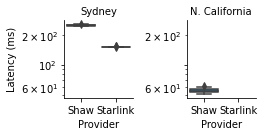

In [67]:
#df_pivot = df_unstacked.pivot_table(index=[N_REGIONS, 'timestamp'], columns='type', values='latency')
#print(df_pivot.head())

g = sns.catplot(data=df_unstacked, x='type', y='latency', col=N_REGIONS, col_wrap=4, kind='box', height=2,
        aspect=0.895, showfliers=True)
g.set(yscale='log')
g.tight_layout()
(g.set_axis_labels('Provider', 'Latency (ms)')
        .set_titles("{col_name}"))

Text(0, 0.5, 'Latency (ms)')

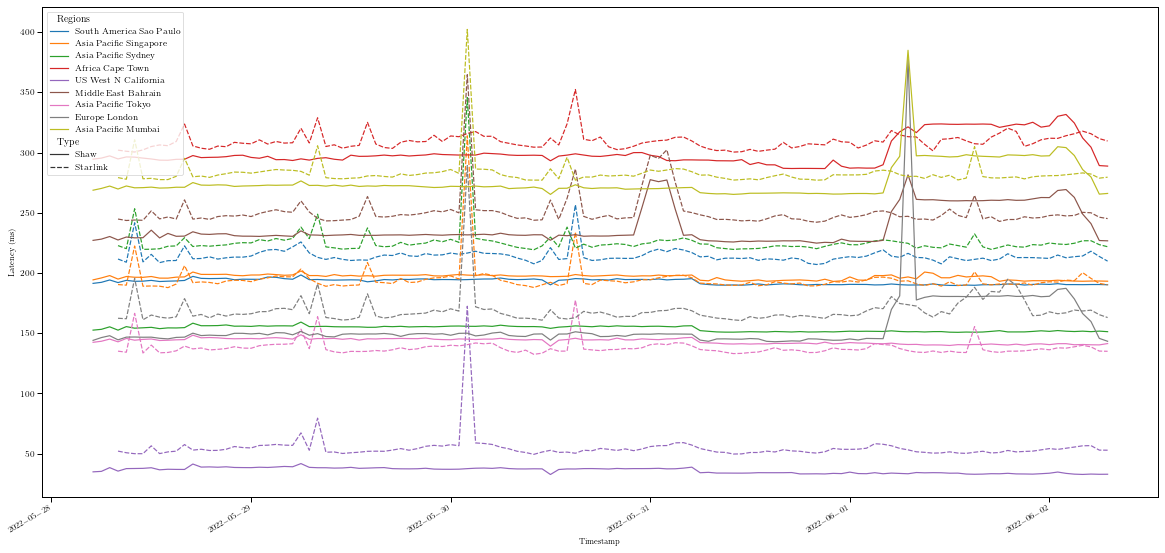

In [141]:
#fig, ax = plt.subplots(figsize=(3.5,2))
#fig, ax = plt.subplots(figsize=(7.16,4))
fig, ax = plt.subplots(figsize=(20,10))

g = sns.lineplot(data=df_unstacked, x=N_TIMESTAMP, y="latency", hue=N_REGIONS, style=N_TYPE)
g.figure.autofmt_xdate()
ax.set_ylabel('Latency (ms)')

Text(0, 0.5, 'Proportion')

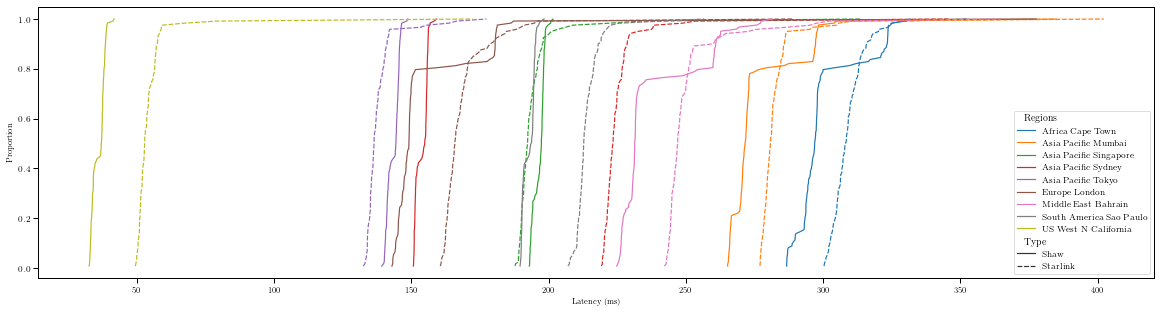

In [142]:
#fig, ax = plt.subplots(figsize=(3.5,2))
#fig, ax = plt.subplots(figsize=(7.16,2.5))
fig_cdf, ax_cdf = plt.subplots(figsize=(20,5))

#g = sns.ecdfplot(data=df_unstacked, x='latency', hue='Type Region', ax=ax)
g = sns.lineplot(data=df_cdf, x='x', y="y", hue=N_REGIONS, style=N_TYPE, ax=ax_cdf)
#g.set(xscale='log')
ax_cdf.set_xlabel('Latency (ms)')
ax_cdf.set_ylabel('Proportion')

In [ ]:
fig

In [143]:
filename = 'output/out_plot'
fig.savefig(f'{filename}.png', bbox_inches='tight')
fig_cdf.savefig(f'{filename}_cdf.png', bbox_inches='tight')
#fig.savefig(f'{filename}.pgf', bbox_inches='tight')

In [ ]:
########
#fig, axs = plt.subplots(1, num_regs, figsize=(7.16,5))
#ax_big = fig.add_subplot(111, frameon=False)

#df_regions = []
#for i in range(num_regs):
#    df_region = df.iloc[:,[i,(num_regs+i)]]
#    boxplt = sns.boxplot(x="variable", y="value", data=pd.melt(df_region), ax=axs[i], showfliers=False)

#    raw_region = df_region.columns[0]
#    region = raw_region.split('/')[1].replace('_',' ').strip()
#    boxplt.set(xlabel=region, ylabel=None)

#    #axs[i].set(yscale='log')
#    axs[i].set_xticklabels(labels=["Shaw", "Starlink"], fontsize=9)
#    axs[i].tick_params(labelsize=9)


#ax_big.set_xlabel("Network Provider and Region", fontsize=10, labelpad=30, fontweight='bold')
#ax_big.set_ylabel("Latency (ms)", fontsize=10, labelpad=30, fontweight='bold')
#ax_big.set_yticklabels([])
#ax_big.set_xticklabels([])
#ax_big.tick_params(
#    which='both',
#    bottom=False,
#    left=False,
#    right=False,
#    top=False)
#ax_big.grid(False)
#############